# Fundamentals

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lukeconibear/intro_ml/blob/main/docs/01_fundamentals.ipynb)

In [ ]:
# if you're using colab, then install the required modules
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    %pip install ...

Machine learning and deep learning are large and growing fields.

This course does not attempt to cover them in detail.

Instead, this course aims to provide high-level intuitions and practical guidance to get started.

To learn more, see the {ref}`Online Courses <online_courses>` below.

## Basic ideas

### Overview

Machine learning is a subset of Artificial Intelligence.

It is a range of methods that learn associations from data.

These can be useful for:

- Prediction problems (e.g., pattern recognition).
- Problems cannot program (e.g., image recognition).
- Faster approximations to problems that can program (e.g., spam classification).

### Methods

Within machine learning, there are many different methods.

The main methods are:

- Classic
    - Simple data, clear features.
- Deep learning (neural networks)
    - Compilcated data, unclear features.
- Reinforcement learning
    - No data, interact with environment.
- Ensembles
    - Poor quality data.

We'll focus on _classic machine learning_ and _deep learning_ in this course.

### Classic Machine Learning

...

Fit a line to the data.

### Deep Learning

Deep means more layers.

### Supervised and unsupervised

- Supervised learning is when you provide labelled outputs to learn from.
- Unsupervised learning when you don't provide any labels.

We'll focus on supervised learning in this course.

### Classification and regression

- Classification problems are those that try to predict a category (i.e., cat or dog).
- Regression problems are those that try to predict a number (i.e., beans in a jar).

### Training, validation, and test splits

The data is normally split into training, validation, and test sets.

- The training set is for training the model.
- The validation set (optional) is for iteratively optimising the model during training.
- The test set is only for testing the model at the end.
    - This should remain untouched and single-use.

The size of the split depends on the size of the dataset and the signal you're trying to predict (i.e., the smaller the signal, then the larger the test set needs to be).

- For small data sets, a split of 60/20/20 for train/validation/test may be suitable.
- For large data sets, a split of 90/5/5 for train/validation/test may be suitable.
- For very large data sets, a split of 98/1/1 for train/validation/test may be suitable.

### Caveats

- Predictions are primarily based on associations, not explanations or causation.
- Predictions and models are specific to the data they were trained on.

- cost function
- gradient descent
- error analysis (e.g., Confusion Matrix)

R2 (coefficient of determination) 
Any value less than 1, as model can be continually awful 
1 is perfect 
0 is not more information than just predicting the mean 

### Deep learning

Steps 

Inputs 

forward propagate 

predict outputs 

compute loss 

backward propagate 

gradient descent 

update weights and biases 


Scale is driving DL progress 

Bigger training data (Larger data sets (labelled, m)) 

Bigger neural networks 

Now investment and attention drive it forward more 

Neural networks (NN) 

Useful for non-linear, with large number of features 

Singular evaluation metric 

Loss function (error on single training example) 

Cost function (average of loss functions over whole training set) 

## Tools

There is huge variety of machine learning and deep learning tools.

In this course, we'll focus on scikit-learn and TensorFlow.

### [scikit-learn](https://scikit-learn.org/stable/)

Scikit-learn has a wide range of simple and efficient machine learning tools.  

There are ones for:

- [Regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#examples))
- [Classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#classification))
- [Clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#cluster-examples))
- And [many more](https://scikit-learn.org/stable/index.html#).

### [TensorFlow](https://www.tensorflow.org/)

Tensorflow is an end-to-end open source machine learning platform.

The [core documentation](https://www.tensorflow.org/guide) has a wide range of useful [tutorials](https://www.tensorflow.org/tutorials).

TensorFlow has a higher-level API (Application Programming Interface) called [Keras](https://keras.io/).

This user-friendly option abstracts away some complexity, so you can focus on your problem.

You can always go to the lower-level API if you want or need to.



There are many 


- [Libraries and extensions](https://www.tensorflow.org/resources/libraries-extensions), such as [TensorFlow Probability](https://www.tensorflow.org/probability)
- [TensorFlow Extended](https://www.tensorflow.org/tfx) for deployment.
- [TensorFlow Lite](https://www.tensorflow.org/lite/guide) for mobile and IoT (internet of things) devices.


## Example - Linear regression

Let's start with a simple example fitting a straight line to data.

We'll see how this in done in each of three key tools we cover here: scikit-learn, TensorFlow, and PyTorch.

Let's create some (noisy) data to train on:

In [1]:
import numpy as np

In [2]:
def create_noisy_linear_data(num_points):
    x = np.arange(num_points)
    noise = np.random.normal(0, 1, num_points)
    y = 2 * x + noise
    # convert to 2D arrays
    x, y = x.reshape(-1, 1), y.reshape(-1, 1)
    return x, y

In [3]:
x_train, y_train = create_noisy_linear_data(10)

```{caution} 

Input arrays to models needs to be 2 dimensional (2D) i.e., a column of rows.

For example, instead of one row:

`>>> np.arange(10)`  
`array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])`  

Convert this to a column of rows using `.reshape(-1, 1)`:  

`>>> np.arange(10).reshape(-1, 1)`  
`array([[0],`  
`       [1],`  
`       [2],`  
`       [3],`  
`       [4],`  
`       [5],`  
`       [6],`  
`       [7],`  
`       [8],`  
`       [9]])`  

```

### scikit-learn

First, let's try with [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html):

In [4]:
from sklearn import linear_model

In [5]:
model_sklearn = linear_model.LinearRegression()

In [6]:
model_sklearn.fit(x_train, y_train)

LinearRegression()

The data was from the line `y = 2x`, so the gradient was 2.

Let's see what the model estimated it to be:

In [7]:
gradient = model_sklearn.coef_[0]
intercept = model_sklearn.intercept_

gradient

array([1.80977179])

Pretty close, considering there was only 10 training data points.

### TensorFlow

Now, for **TensorFlow**:

In [8]:
import tensorflow as tf

2022-03-11 17:08:50.421724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-11 17:08:50.421741: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
])

2022-03-11 17:08:51.386563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-11 17:08:51.386585: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-11 17:08:51.386597: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UOL-LAP-5G6CZH3): /proc/driver/nvidia/version does not exist
2022-03-11 17:08:51.386764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model_tf.compile(
    optimizer="sgd",
    loss="mean_squared_error",
    metrics=["accuracy"]
)

In [11]:
model_tf.fit(x_train, y_train, epochs=500, verbose=False);

And, let's see what this model though the gradient was:

In [25]:
model_tf.weights[0].numpy()

array([[1.8126204]], dtype=float32)

Now, we can see how well these models fit a line to the data:

In [26]:
y_pred_sklearn = model_sklearn.predict(x_train)

In [27]:
y_pred_tf = model_tf.predict(x_train)

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
params = {'font.size': 14, 'text.usetex': True}
matplotlib.rcParams.update(params)

In [33]:
colors = {
    'data': '#1b9e77',
    'sklearn': "#d95f02",
    'tf': "#7570b3"
}

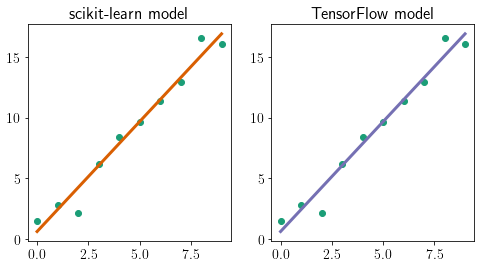

In [34]:
fig = plt.figure(1, figsize=(8, 4))
ax1, ax2 = fig.subplots(1, 2)

ax1.scatter(x_train, y_train, color=colors['data'])
ax1.plot(x_train, y_pred_sklearn, color=colors['sklearn'], linewidth=3)
ax1.set_title('scikit-learn model')

ax2.scatter(x_train, y_train, color=colors['data'])
ax2.plot(x_train, y_pred_tf, color=colors['tf'], linewidth=3)
ax2.set_title('TensorFlow model')

plt.show()

They both did a good job of fitting a function to the data.

In other words, they found the association in the data.

However, this was a very simple example that probably didn't require machine learning (let alone deep learning).

Though it demonstrates what they do.

Now, let's look at something a little more complicated.

## Example - Digit classification

Let's train a model to recognise digits.

This is a classification task.

### scikit-learn

First, with [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html):

In [187]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Load the data:

In [188]:
digits = datasets.load_digits()

Take a look at the labelled data:

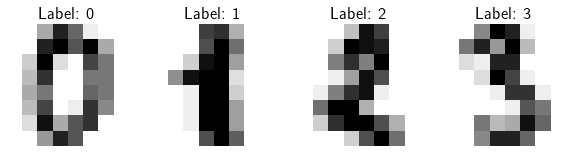

In [60]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Preprocess and split the data:

In [148]:
def preprocess_data(digits):
    # the data comes as 2D 8x8 pixels
    # flatten the images to 1D 64 pixels
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))
    return n_samples, data

In [62]:
n_samples, data = preprocess_data(digits)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

Create a model.

Here, we will use a [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

...

In [64]:
model = svm.SVC(gamma=0.001)

Fit the model to the training data:

In [65]:
model.fit(X_train, y_train)

SVC(gamma=0.001)

Use the model to predict the test data:

In [66]:
y_pred = model.predict(X_test)

Take a look at the predictions for these test digits:

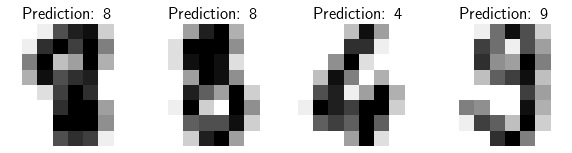

In [67]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)  # 1D 64 pixels to 2D 8*8 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction:.0f}")

How well did our model do overall?

In [79]:
overall_accuracy = metrics.accuracy_score(y_test, y_pred)
overall_accuracy

0.9688542825361512

97% accuracy is very good.

Let's do some quick error analysis using a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix).

This shows how well the classification model did for each category.

The predictions are on the x-axis and the true labels from the test data are on the y-axis.

A perfect score would be where the predictions always match the true labels (i.e., all values are on the diagonal line).

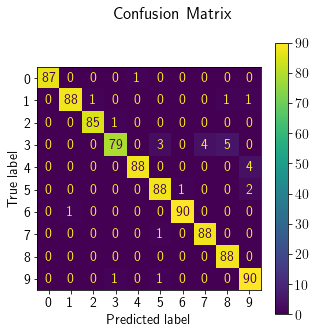

In [80]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred
)
confusion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

We can see that the although the model did well, it struggled with 3's by confusing them with 5's, 7's, and 8's.

This points us in the direction of how we might improve the model.

### TensorFlow

In [193]:
from tensorflow.keras.datasets import mnist

Load and split the data:

In [194]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Take a look at some of the training data:

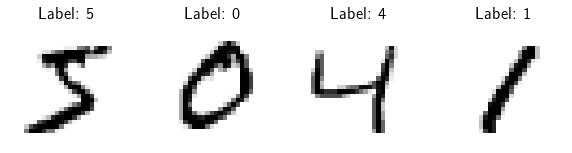

In [195]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, train_images, train_labels):
    ax.set_axis_off()
    image = image.reshape(28, 28)  # 1D 784 pixels to 2D 28*28 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Preprocess the data:

In [196]:
def preprocess_data(data):
    data_reshaped = data.reshape((
        data.shape[0], data.shape[1] * data.shape[2]
    ))
    data_reshaped_normalised = data_reshaped.astype("float32") / 255
    return data_reshaped_normalised

In [197]:
train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

Create the model:

In [198]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Compile the model:

In [199]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Fit the model to the training data:

In [200]:
model.fit(
    train_images, train_labels, epochs=1, batch_size=128, verbose=False
);

Use the model for predictions with [`model.predict()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) (i.e., inference).

In [137]:
y_pred = model.predict(test_images)

Each prediction has a probability per category:

In [152]:
y_pred[0]

array([1.4859360e-05, 2.6284380e-07, 2.2085520e-04, 4.3156010e-04,
       3.6495936e-07, 9.2538012e-06, 1.9821407e-09, 9.9926859e-01,
       2.3246564e-06, 5.1873561e-05], dtype=float32)

The most likely category can be found by finding the maximum of these (using [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)):

In [155]:
np.argmax(y_pred[0])

7

So, the model things the first digit is a 7.

Let's plot the first four test digits with their predictions to see:

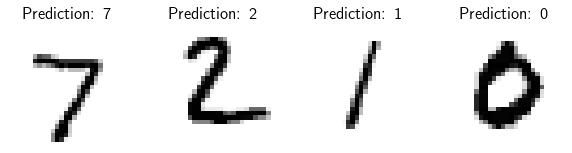

In [156]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, test_images, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)  # 1D 784 pixels to 2D 28*28 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {np.argmax(prediction):.0f}")

Nice.

Let's now evaluate the model overall:

In [158]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy (R2): {test_acc}")

313/313 [==============================] - 0s 705us/step - loss: 0.1302 - accuracy: 0.9610
Test accuracy (R2): 0.9610000252723694


Similar to scikit-learn an overall accuracy of 96% is very good.

A before, let's have a look at a confusion matrix for this.

_TensorFlow does have its own [`confusion_matrix`](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) method. Though I'll use the scikit-learn one here again as it has a nice plot feature._

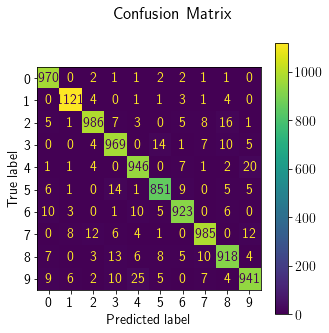

In [186]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(
    test_labels, np.argmax(y_pred, axis=1)
)
confusion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

This model did well for most digits, though struggled a bit with 5's.

## Exercises

```{admonition} Exercise 1

...

```

## {ref}`Solutions <fundamentals>`

## Key Points

```{important}

- [x] _..._

```

## Further information

### Good practices

- ...

### Other options

There are many other excellent options, including:

#### [PyTorch](https://pytorch.org/)

PyTorch is an end-to-end open source machine learning platform.

There are many tools built upon PyTorch, including:

- [fastai](https://docs.fast.ai/)
    - A high-level API for PyTorch.
- [PyTorch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/)
    - Helps write boilerplate code, scale out to multiple devices, and other helpful things.
- [GPyTorch](https://gpytorch.ai/)
    - A highly efficient and modular implementation of GPs, with GPU acceleration.

#### [JAX](https://jax.readthedocs.io/en/latest/#)

JAX is library for GPU accelerated NumPy with automatic differentiation.

There are many tools built upon JAX, including:

- [Flax](https://github.com/google/flax)
    - A neural network library and ecosystem for JAX that is designed for flexibility.
- [Haiku](https://dm-haiku.readthedocs.io/en/latest/)
    - Built on top of JAX to provide simple, composable abstractions for machine learning research.
 
### Resources

- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/), Aurélien Géron, 2019, O’Reilly Media, Inc.  
    - [Jupyter notebooks](https://github.com/ageron/handson-ml2).  
- [Deep Learning with Python, 2nd Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff), François Chollet, 2021, Manning.  
    - [Jupyter notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks).  
- [Artificial Intelligence: A Modern Approach, 4th edition](http://aima.cs.berkeley.edu/), Stuart Russell and Peter Norvig, 2021, Pearson.  
- [Machine Learning Yearning](https://www.deeplearning.ai/programs/), Andrew Ng.  
- [Machine Learning for Everyone](https://vas3k.com/blog/machine_learning/).   

(online_courses)=
### Online courses

#### Machine learning

- [Machine learning](https://www.coursera.org/learn/machine-learning), Coursera, Andrew Ng.
    - CS229, Stanford University: [Video lectures](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU).  
- [Artificial Intelligence: Principles and Techniques](https://www.youtube.com/playlist?list=PLoROMvodv4rO1NB9TD4iUZ3qghGEGtqNX), Percy Liang and Dorsa Sadigh, CS221, Standord, 2019.  


#### Deep learning

- [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning), Coursera, DeepLearning.AI (_NumPy and TensorFlow_)
    - CS230, Stanford University: [Video lectures](https://www.youtube.com/playlist?list=PLoROMvodv4rOABXSygHTsbvUz4G_YQhOb), [Syllabus](http://cs230.stanford.edu/syllabus/)
- [NYU Deep Learning](https://atcold.github.io/NYU-DLSP21/), Yann LeCun and Alfredo Canziani, NYU, 2021 (_PyTorch_)
    - [Video lectures](https://www.youtube.com/playlist?list=PLLHTzKZzVU9e6xUfG10TkTWApKSZCzuBI)  
- [Practical Deep Learning for Coders](https://course.fast.ai/), Jeremy Howard and Sylvain Gugger, 2020. (_PyTorch_)  
    - [Video lectures](https://www.youtube.com/playlist?list=PLfYUBJiXbdtRL3FMB3GoWHRI8ieU6FhfM)
- [NVIDIA Deep Learning and Data Science with GPUs](https://web.cvent.com/event/5f037a53-5be6-4abf-9b48-dc94e8a8ee3a/summary?rt=QZKIZW0GWUGNA6QZE4e55Aummary)
- [Neural Networks for Machine Learning](https://www.youtube.com/playlist?list=PLLssT5z_DsK_gyrQ_biidwvPYCRNGI3iv), Geoffrey Hinton.

    
    
